In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('data/clean_data.csv').drop('Unnamed: 0',axis=1)
df

IsCanceled Hotel Continent  is_europe  LeadTime  ArrivalDateMonth  \
0               0    h1    Europe          1         7                 7   
1               0    h1    Europe          1        13                 7   
2               0    h1    Europe          1        14                 7   
3               0    h1    Europe          1         0                 7   
4               0    h1    Europe          1         9                 7   
...           ...   ...       ...        ...       ...               ...   
86202           0    h2    Europe          1        23                 8   
86203           0    h2    Europe          1       102                 8   
86204           0    h2    Europe          1        34                 8   
86205           0    h2    Europe          1       109                 8   
86206           0    h2    Europe          1       205                 8   

       ArrivalDateDayOfMonth  revenue  total_people  Meal  MarketSegment  \
0                          1    75.00           1.0     1         Direct   
1                          1    75.00           1.0     1      Corporate   
2                          1   196.00           2.0     1      Online TA   
3                          1   214.00           2.0     1         Direct   
4                          1   206.00           2.0     1         Direct   
...                      ...      ...           ...   ...            ...   
86202                     30   672.98           2.0     1  Offline TA/TO   
86203                     31  1578.01           3.0     1      Online TA   
86204                     31  1103.97           2.0     1      Online TA   
86205                     31   730.80           2.0     1      Online TA   
86206                     29  1360.80           2.0     1      Online TA   

       IsRepeatedGuest  PreviousCancellations      agent_type  \
0                    0                      0        no_agent   
1                    0                      0  uncommon_agent   
2                    0                      0   popular_agent   
3                    0                      0        no_agent   
4                    0                      0  uncommon_agent   
...                ...                    ...             ...   
86202                0                      0  uncommon_agent   
86203                0                      0   popular_agent   
86204                0                      0   popular_agent   
86205                0                      0  uncommon_agent   
86206                0                      0   popular_agent   

       res_equals_assign  BookingChanges DepositType  wait_list CustomerType  \
0                      0               0  No Deposit          0    Transient   
1                      1               0  No Deposit          0    Transient   
2                      1               0  No Deposit          0    Transient   
3                      1               0  No Deposit          0    Transient   
4                      1               0  No Deposit          0    Transient   
...                  ...             ...         ...        ...          ...   
86202                  1               0  No Deposit          0    Transient   
86203                  1               0  No Deposit          0    Transient   
86204                  1               0  No Deposit          0    Transient   
86205                  1               0  No Deposit          0    Transient   
86206                  1               0  No Deposit          0    Transient   

       RequiredCarParkingSpaces  special_requests  
0                             0                 0  
1                             0                 0  
2                             0                 1  
3                             0                 0  
4                             0                 1  
...                         ...               ...  
86202                         0                 0  
86203                  

In [5]:
df.columns

Index(['IsCanceled', 'Hotel', 'Continent', 'is_europe', 'LeadTime',
       'ArrivalDateMonth', 'ArrivalDateDayOfMonth', 'revenue', 'total_people',
       'Meal', 'MarketSegment', 'IsRepeatedGuest', 'PreviousCancellations',
       'agent_type', 'res_equals_assign', 'BookingChanges', 'DepositType',
       'wait_list', 'CustomerType', 'RequiredCarParkingSpaces',
       'special_requests'],
      dtype='object')

# PART 1: Features and Target

For our features we will be exluding:
* `PreviousBookingsNotCanceled` due to collinearity with `PreviousCancellations`
* `ReservedRoomType` and `AssignedRoomType` because new variable `res_equals_assign` was created.

In [6]:
X = df.drop(['IsCanceled'],axis=1)

y = df['IsCanceled']

In [7]:
print('X Shape: ',X.shape)
print('y Shape: ',y.shape)

X Shape:  (86207, 20)
y Shape:  (86207,)


# PART 2: One-Hot Encoding

In [8]:
X_dummies = pd.get_dummies(X, drop_first=True)
print('X Shape with Dummy Variables: ',X_dummies.shape)

X Shape with Dummy Variables:  (86207, 37)


# PART 3: Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, stratify=y, random_state=44)

print('X_train Shape: ',X_train.shape)
print('X_test Shape: ',X_test.shape)
print('y_train Shape: ',y_train.shape)
print('y_test Shape: ',y_test.shape)

X_train Shape:  (68965, 37)
X_test Shape:  (17242, 37)
y_train Shape:  (68965,)
y_test Shape:  (17242,)


# PART 4: Standardizing/Normalizing Features

In [10]:
X_train.head()

is_europe  LeadTime  ArrivalDateMonth  ArrivalDateDayOfMonth  revenue  \
64499          1        49                 7                     17    168.3   
30114          1         1                 5                     23     97.0   
85850          1       457                 8                     25    244.8   
48072          1       116                 4                     29    378.0   
60891          1        10                 5                      9    252.0   

       total_people  Meal  IsRepeatedGuest  PreviousCancellations  \
64499           3.0     1                0                      0   
30114           2.0     1                0                      0   
85850           2.0     1                0                      0   
48072           3.0     1                0                      0   
60891           2.0     1                0                      0   

       res_equals_assign  BookingChanges  wait_list  RequiredCarParkingSpaces  \
64499                  1               0          0                         0   
30114                  1               0          0                         1   
85850                  0               1          0                         0   
48072                  1               0          0                         0   
60891                  1               0          0                         0   

       special_requests  Hotel_h2  Continent_Antarctica  Continent_Asia  \
64499                 1         1                     0               0   
30114                 1         0                     0               0   
85850                 1         1                     0               0   
48072                 0         1                     0               0   
60891                 1         1                     0               0   

       Continent_Europe  Continent_North America  Continent_Oceania  \
64499                 1                        0                  0   
30114                 1                        0                  0   
85850                 1                        0                  0   
48072                 1                        0                  0   
60891                 1                        0                  0   

       Continent_South America  Continent_unknown  \
64499                        0                  0   
30114                        0                  0   
85850                        0                  0   
48072                        0                  0   
60891                        0                  0   

       MarketSegment_Complementary  MarketSegment_Corporate  \
64499                            0                        0   
30114                            0                        0   
85850                            0                        0   
48072                            0                        0   
60891                            0                        0   

       MarketSegment_Direct  MarketSegment_Groups  \
64499                     0                     0   
30114                     1                     0   
85850                     0                     0   
48072                     0                     0   
60891                     0                     0   

       MarketSegment_Offline TA/TO  MarketSegment_Online TA  \
64499                            0                        1   
30114                            0                        0   
85850                            1                        0   
48072                            0                        1   
60891                            0                        1   

       MarketSegment_Undefined  agent_type_no_agent  agent_type_popular_agent  \
64499                        0                    0                         1   
30114                        0                    0                         1   
85850                        0                    0                         1   
48072                     

In [11]:
mm = MinMaxScaler()
X_train_mm = pd.DataFrame(mm.fit_transform(X_train), columns = X_train.columns)
X_train_mm.head()

is_europe  LeadTime  ArrivalDateMonth  ArrivalDateDayOfMonth   revenue  \
0        1.0  0.069111          0.545455               0.533333  0.022174   
1        1.0  0.001410          0.363636               0.733333  0.012780   
2        1.0  0.644570          0.636364               0.800000  0.032253   
3        1.0  0.163611          0.272727               0.933333  0.049802   
4        1.0  0.014104          0.363636               0.266667  0.033202   

   total_people  Meal  IsRepeatedGuest  PreviousCancellations  \
0      0.181818   1.0              0.0                    0.0   
1      0.090909   1.0              0.0                    0.0   
2      0.090909   1.0              0.0                    0.0   
3      0.181818   1.0              0.0                    0.0   
4      0.090909   1.0              0.0                    0.0   

   res_equals_assign  BookingChanges  wait_list  RequiredCarParkingSpaces  \
0                1.0             0.0        0.0                       0.0   
1                1.0             0.0        0.0                       1.0   
2                0.0             1.0        0.0                       0.0   
3                1.0             0.0        0.0                       0.0   
4                1.0             0.0        0.0                       0.0   

   special_requests  Hotel_h2  Continent_Antarctica  Continent_Asia  \
0               1.0       1.0                   0.0             0.0   
1               1.0       0.0                   0.0             0.0   
2               1.0       1.0                   0.0             0.0   
3               0.0       1.0                   0.0             0.0   
4               1.0       1.0                   0.0             0.0   

   Continent_Europe  Continent_North America  Continent_Oceania  \
0               1.0                      0.0                0.0   
1               1.0                      0.0                0.0   
2               1.0                      0.0                0.0   
3               1.0                      0.0                0.0   
4               1.0                      0.0                0.0   

   Continent_South America  Continent_unknown  MarketSegment_Complementary  \
0                      0.0                0.0                          0.0   
1                      0.0                0.0                          0.0   
2                      0.0                0.0                          0.0   
3                      0.0                0.0                          0.0   
4                      0.0                0.0                          0.0   

   MarketSegment_Corporate  MarketSegment_Direct  MarketSegment_Groups  \
0                      0.0                   0.0                   0.0   
1                      0.0                   1.0                   0.0   
2                      0.0                   0.0                   0.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   0.0   

   MarketSegment_Offline TA/TO  MarketSegment_Online TA  \
0                          0.0                      1.0   
1                          0.0                      0.0   
2                          1.0                      0.0   
3                          0.0                      1.0   
4                          0.0                      1.0   

   MarketSegment_Undefined  agent_type_no_agent  agent_type_popular_agent  \
0                      0.0                  0.0                       1.0   
1                      0.0                  0.0                       1.0   
2                      0.0                  0.0                       1.0   
3                      0.0                  0.0                       1.0   
4                      0.0                  0.0                       1.0   

   agent_type_uncommon_agent  DepositType_Non Refund  DepositType_Refundable  \
0                        0.0                

In [12]:
X_test_mm = pd.DataFrame(mm.transform(X_test), columns = X_test.columns)
X_test_mm.head()

is_europe  LeadTime  ArrivalDateMonth  ArrivalDateDayOfMonth   revenue  \
0        1.0  0.063470          0.454545               0.266667  0.045323   
1        1.0  0.000000          0.090909               0.800000  0.010145   
2        1.0  0.000000          0.090909               0.166667  0.007246   
3        1.0  0.000000          0.181818               0.666667  0.011726   
4        1.0  0.053597          0.454545               0.633333  0.052648   

   total_people  Meal  IsRepeatedGuest  PreviousCancellations  \
0      0.181818   1.0              0.0                    0.0   
1      0.090909   0.0              0.0                    0.0   
2      0.090909   1.0              0.0                    0.0   
3      0.090909   0.0              0.0                    0.0   
4      0.090909   1.0              0.0                    0.0   

   res_equals_assign  BookingChanges  wait_list  RequiredCarParkingSpaces  \
0                1.0             1.0        0.0                       0.0   
1                1.0             0.0        0.0                       0.0   
2                1.0             0.0        0.0                       0.0   
3                1.0             0.0        0.0                       0.0   
4                1.0             0.0        0.0                       0.0   

   special_requests  Hotel_h2  Continent_Antarctica  Continent_Asia  \
0               0.0       0.0                   0.0             0.0   
1               0.0       1.0                   0.0             0.0   
2               0.0       0.0                   0.0             0.0   
3               0.0       1.0                   0.0             0.0   
4               1.0       1.0                   0.0             0.0   

   Continent_Europe  Continent_North America  Continent_Oceania  \
0               1.0                      0.0                0.0   
1               1.0                      0.0                0.0   
2               1.0                      0.0                0.0   
3               1.0                      0.0                0.0   
4               1.0                      0.0                0.0   

   Continent_South America  Continent_unknown  MarketSegment_Complementary  \
0                      0.0                0.0                          0.0   
1                      0.0                0.0                          0.0   
2                      0.0                0.0                          0.0   
3                      0.0                0.0                          0.0   
4                      0.0                0.0                          0.0   

   MarketSegment_Corporate  MarketSegment_Direct  MarketSegment_Groups  \
0                      0.0                   0.0                   0.0   
1                      0.0                   1.0                   0.0   
2                      0.0                   1.0                   0.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   0.0   

   MarketSegment_Offline TA/TO  MarketSegment_Online TA  \
0                          0.0                      1.0   
1                          0.0                      0.0   
2                          0.0                      0.0   
3                          0.0                      1.0   
4                          0.0                      1.0   

   MarketSegment_Undefined  agent_type_no_agent  agent_type_popular_agent  \
0                      0.0                  0.0                       1.0   
1                      0.0                  1.0                       0.0   
2                      0.0                  1.0                       0.0   
3                      0.0                  0.0                       1.0   
4                      0.0                  0.0                       1.0   

   agent_type_uncommon_agent  DepositType_Non Refund  DepositType_Refundable  \
0                        0.0                

# PART 5: PCA

In [13]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_mm)

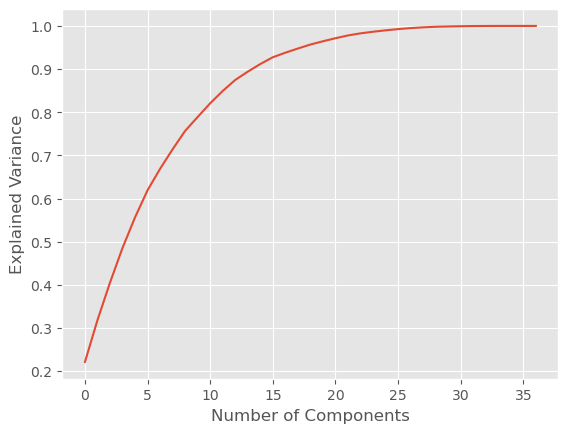

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

In [16]:
pca_95 = PCA(n_components=0.95)
X_train_pca_95 = pca_95.fit_transform(X_train_mm)
X_train_pca_df = pd.DataFrame(X_train_pca_95, columns=[f'PC{i}' for i in range(1, 20)])
print(X_train_pca_df.shape)

(68965, 19)


In [18]:
X_test_pca_95 = pca_95.transform(X_test_mm)
X_test_pca_df = pd.DataFrame(X_test_pca_95, columns=[f'PC{i}' for i in range(1, 20)])
print(X_test_pca_df.shape)

(17242, 19)


In [20]:
pca_df = pd.DataFrame(X_train_pca_95, columns=[f'PC{i}' for i in range(1, 20)])
pca_df['target'] = y_train.reset_index(drop=True)
pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.805574 -0.017510  0.147086 -0.160077  0.329051  0.161711 -0.085523   
1  0.117171 -1.059606 -0.111237  0.264910  0.220269 -0.023054  0.397280   
2  0.591822  0.572299  1.370180  0.269143  0.357582  0.234217  0.965474   
3 -0.489247  0.331234 -0.305297 -0.541620 -0.150968 -0.296582 -0.047292   
4 -0.806327 -0.014393  0.134726 -0.159202  0.332381  0.154160 -0.097559   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.061211 -0.016714 -0.229176 -0.030425  0.005903 -0.025911  0.047385   
1 -0.908890  0.143565  0.172434  0.312761 -0.114482  0.678287  0.103385   
2  0.198340  0.691905 -0.125694  0.313032  0.041713 -0.017388 -0.475357   
3 -0.015937 -0.003547 -0.341739  0.357795 -0.197916  0.013284  0.015841   
4 -0.050005 -0.001817 -0.117370 -0.266551 -0.184775 -0.016255  0.053629   

       PC15      PC16      PC17      PC18      PC19  target  
0  0.006770 -0.009309 -0.000148 -0.023853  0.006034       0  
1  0.140361  0.138369  0.023143 -0.059905 -0.012321       0  
2 -0.010955 -0.128740 -0.042007 -0.091690 -0.016567       0  
3 -0.059688 -0.022731 -0.010594 -0.002605  0.018881       1  
4  0.005388 -0.006045  0.001938 -0.029252  0.005367       0

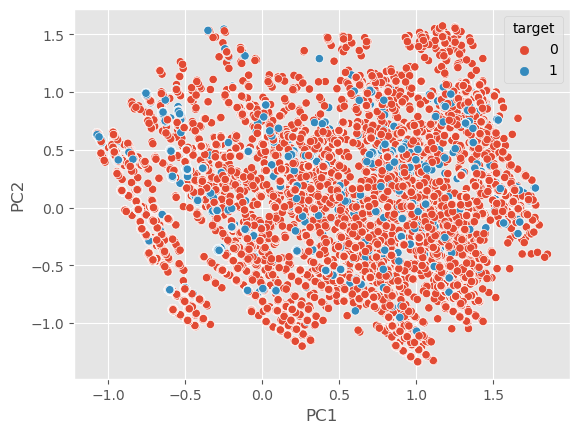

In [21]:
ax = sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

In [23]:
loadings = pd.DataFrame(
    data=pca_95.components_.T * np.sqrt(pca_95.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, 20)],
    index=X_train.columns
)
loadings.head()

PC1       PC2       PC3       PC4       PC5  \
is_europe              0.052251 -0.109237  0.104309 -0.255839  0.098707   
LeadTime               0.001373  0.011395  0.029507 -0.007371 -0.016350   
ArrivalDateMonth       0.007058 -0.005782  0.027074  0.001877  0.000980   
ArrivalDateDayOfMonth  0.002221 -0.002660 -0.002036 -0.001088 -0.001591   
revenue               -0.005796 -0.007196  0.002685 -0.000464 -0.006984   

                            PC6       PC7       PC8       PC9      PC10  \
is_europe             -0.043611  0.002793  0.004687 -0.002838  0.009640   
LeadTime               0.006765  0.012767 -0.010024 -0.014617 -0.005117   
ArrivalDateMonth       0.017149  0.015082 -0.011485 -0.005658 -0.041489   
ArrivalDateDayOfMonth -0.001560  0.000348 -0.002833 -0.012070 -0.093640   
revenue                0.001206  0.006793 -0.005590 -0.008137 -0.002717   

                           PC11      PC12      PC13      PC14      PC15  \
is_europe              0.002927 -0.000942 -0.000104  0.002364 -0.002727   
LeadTime              -0.000675  0.010038 -0.010979  0.010375  0.019551   
ArrivalDateMonth      -0.026161  0.273482 -0.007997 -0.007853  0.000085   
ArrivalDateDayOfMonth  0.279155  0.011166 -0.001916 -0.004177 -0.001160   
revenue               -0.002070  0.003057 -0.002711  0.001489 -0.002455   

                           PC16      PC17      PC18      PC19  
is_europe              0.000108 -0.000131 -0.000594 -0.004022  
LeadTime              -0.021551 -0.008411  0.003117  0.002841  
ArrivalDateMonth       0.002525  0.000677  0.004495 -0.002144  
ArrivalDateDayOfMonth  0.002527  0.000579 -0.000137  0.001502  
revenue               -0.001398 -0.000628 -0.000345 -0.000624

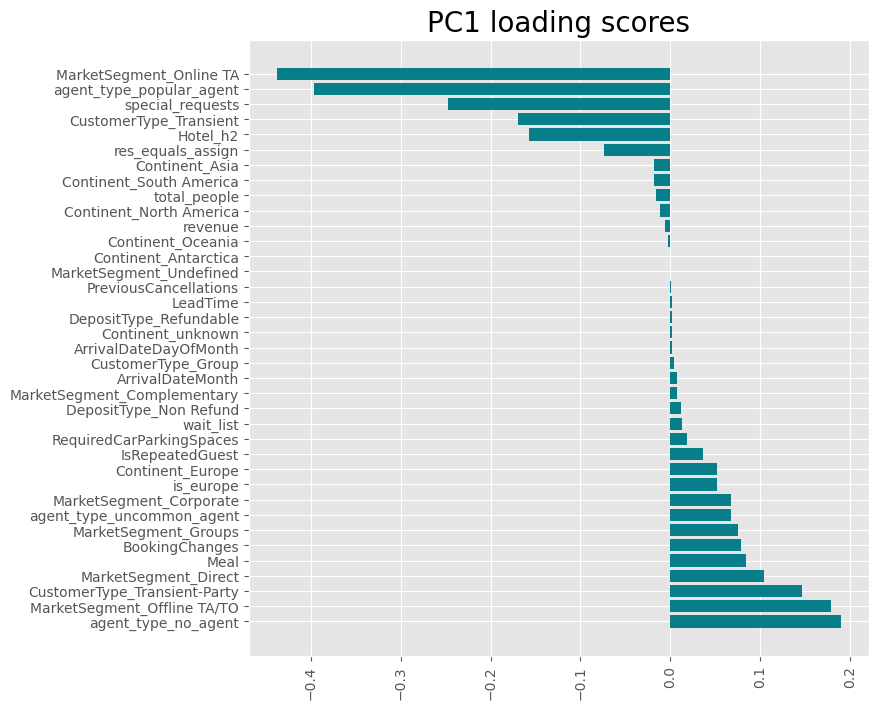

In [24]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.figure(figsize=(8,8))
plt.barh(y=pc1_loadings['Attribute'], width=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PC1 loading scores', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
# number of components
n_pcs= pca_95.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca_95.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X_train.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
pca_important_features = pd.DataFrame(dic.items(), columns=['PC','most_important_feature'])
pca_important_features

PC       most_important_feature
0    PC0      MarketSegment_Online TA
1    PC1                     Hotel_h2
2    PC2       CustomerType_Transient
3    PC3                    is_europe
4    PC4                     Hotel_h2
5    PC5  MarketSegment_Offline TA/TO
6    PC6               BookingChanges
7    PC7         MarketSegment_Direct
8    PC8            res_equals_assign
9    PC9                         Meal
10  PC10        ArrivalDateDayOfMonth
11  PC11             ArrivalDateMonth
12  PC12     RequiredCarParkingSpaces
13  PC13    agent_type_uncommon_agent
14  PC14         MarketSegment_Groups
15  PC15    agent_type_uncommon_agent
16  PC16               Continent_Asia
17  PC17              IsRepeatedGuest
18  PC18      Continent_North America